In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch

from tqdm import tqdm

sys.path.insert(0, "../")

%load_ext autoreload
%autoreload 2

/cvlabdata2/home/davydov/miniconda3/envs/hmr_ssl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import src

In [30]:
from src.datasets.h36m import Human36M
from src.datasets.datasets_common import UNNORMALIZE
h36m_dset = Human36M(seqlen=2, set="test")

Human36M Dataset overlap ratio:  0.0
Loaded h36m dataset from /cvlabdata2/home/davydov/videoHMR_SSL/data/h36m/h36m_test_25fps_db.pt
h36m - number of dataset objects 108810


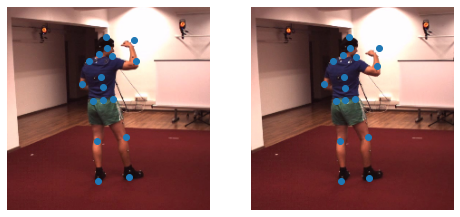

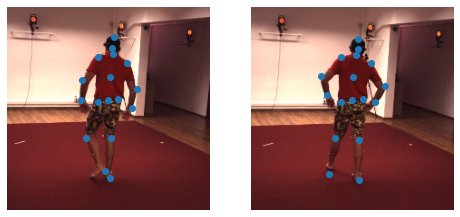

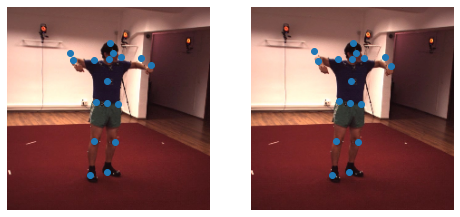

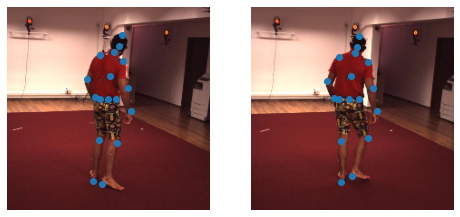

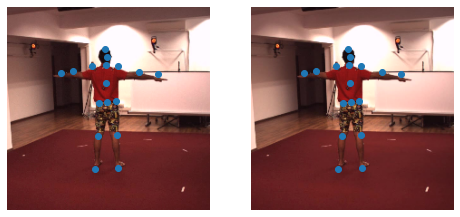

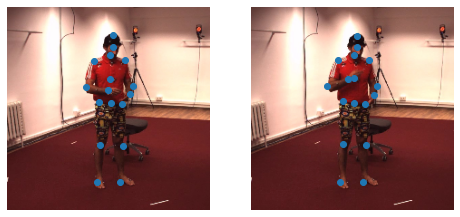

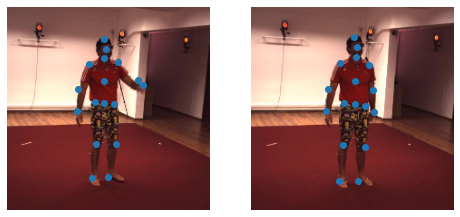

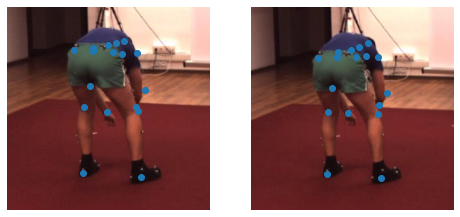

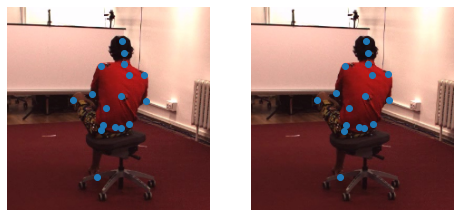

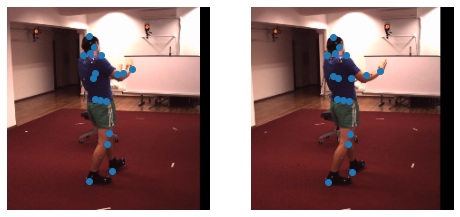

In [4]:
np.random.seed(10)
for _ in range(10):
    idx = np.random.randint(0, len(h36m_dset))
    sample = h36m_dset[idx]
    
    img = UNNORMALIZE(sample['video']).permute(0,2,3,1)
    kp_2d = sample['kp_2d']
    kp_2d[:,:,:2] = (kp_2d[:,:,:2] + 1) / 2 * 224
    
    take_every = 5
    img = img[::take_every]
    kp_2d = kp_2d[::take_every]
    fig, ax = plt.subplots(1,len(img),figsize=(4*len(img),4))
    for i in range(len(img)):
        ax[i].imshow(img[i])
        
        kp_2d_ = kp_2d[i]
        mask = kp_2d_[:,2] > 0.
        ax[i].scatter(kp_2d_[:,0][mask], kp_2d_[:,1][mask])
        ax[i].set_axis_off()